In [1]:
from __future__ import division, print_function

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20

In [2]:
import os
import ketu
import numpy as np
import matplotlib.pyplot as pl
from transit import SimpleSystem

In [3]:
campaign = 1
# epicid = "201367065"
# epicid = "201912552"
epicid = "201763507"
basepath = "/Users/dfm/data/k2"
light_curve_file = os.path.join(basepath, "lightcurves/c{0}".format(campaign),
                                "{0}00000/{1}000/ktwo{2}-c{3:02d}_lpd-lc.fits"
                                .format(epicid[:4], epicid[4:6], epicid, campaign))

query = dict(
    invert=False,
    light_curve_file=light_curve_file,
    basis_file=os.path.join(basepath, "elcs/c{0}-norm.h5".format(campaign)),
    catalog_file=os.path.join(basepath, "catalogs/epic.h5"),
    nbasis=500,
    initial_time=1975.0,
    skip=200,
#     initial_time=2015.,
#     skip=0,
    durations=[0.05, 0.1, 0.2],
    min_period=3.,
    max_period=50.,
    npeaks=3,
    injections=[dict(period=5.275, t0=0.45, radius=0.07, b=0.5, q1=0.5, q2=0.5, e=0.01, pomega=0.0)],
    # use_gp=False,
)

In [4]:
pipe = ketu.k2.Data(cache=False)
pipe = ketu.k2.Inject(pipe, cache=False)
pipe = ketu.k2.Likelihood(pipe, cache=False)
pipe = ketu.OneDSearch(pipe, cache=True)
# pipe = ketu.TwoDSearch(pipe, cache=False)
pipe = ketu.IterativeTwoDSearch(pipe, cache=True)
pipe = ketu.Vetter(pipe, cache=True, clobber=True)
pipe = ketu.FeatureExtract(pipe, cache=True, clobber=True)

In [5]:
r = pipe.query(**query)

Querying Data
Finished querying Data in 0.70s
Querying Inject
Finished querying Inject in 0.00s
Querying Likelihood
tau = 2.53802490234
tau = 2.51763916016
tau = 2.51763916016
tau = 6.53503417969
tau = 6.58569335938
tau = 6.58569335938
Finished querying Likelihood in 5.44s
Querying OneDSearch
Finished querying OneDSearch in 53.35s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch in 120.99s
Querying Vetter
Finished querying Vetter in 5.88s
Querying FeatureExtract
Finished querying FeatureExtract in 0.00s


In [12]:
print(r.features.dtype)

[('depth', '<f8'), ('depth_ivar', '<f8'), ('duration', '<f8'), ('lnZ_box', '<f8'), ('lnZ_none', '<f8'), ('lnZ_outlier', '<f8'), ('lnZ_transit', '<f8'), ('lnlike_box', '<f8'), ('lnlike_none', '<f8'), ('lnlike_outlier', '<f8'), ('lnlike_transit', '<f8'), ('period', '<f8'), ('phic_same', '<f8'), ('phic_same_second', '<f8'), ('phic_variable', '<f8'), ('s2n', '<f8'), ('t0', '<f8'), ('transit_b', '<f8'), ('transit_duration', '<f8'), ('transit_period', '<f8'), ('transit_q1', '<f8'), ('transit_q2', '<f8'), ('transit_ror', '<f8'), ('transit_t0', '<f8'), ('meta_starid', '<i8'), ('meta_hasinj', '?'), ('meta_isrec', '?'), ('inj_period', '<f8'), ('inj_t0', '<f8'), ('inj_radius', '<f8'), ('inj_b', '<f8'), ('inj_e', '<f8'), ('inj_pomega', '<f8')]


In [13]:
r.features

array([ (4.340408685073666, 614.5521857840376, 0.1, -1938.2937221853879, -8662.384079126652, -8395.570169437771, -1228.753997332055, -1936.0037641408617, -8662.384079126652, -8394.770669638008, -1197.2590589257798, 5.273751177776988, 3948.048687806017, 1748.7363289313466, -20094.078238299786, 107.59943915880156, 0.4610388612855081, 0.47375173846815094, 0.12083346070245365, 5.274974437224087, 0.49970565182467924, 0.49986625128265905, 0.06990272776817673, 0.4502959371714934, 201763507, True, True, 5.275, 0.45, 0.07, 0.5, 0.01, 0.0),
       (1.0222762703858868, 293.21631848667585, 0.1, -1090.4177095359553, -1197.2508418566247, -1161.9629145365539, -1040.3861243591184, -1088.51426819901, -1197.2508418566247, -1161.1590051474323, -1022.9826770488509, 11.22087819446769, -1694.460994141129, -1763.3671868904216, -12820.137867016872, 17.50500939320918, 0.3639118445948455, 0.4905963889353623, 0.09236685391575458, 11.232508966191991, 0.5020505566955104, 0.5006966047405789, 0.034197257788487485, 0

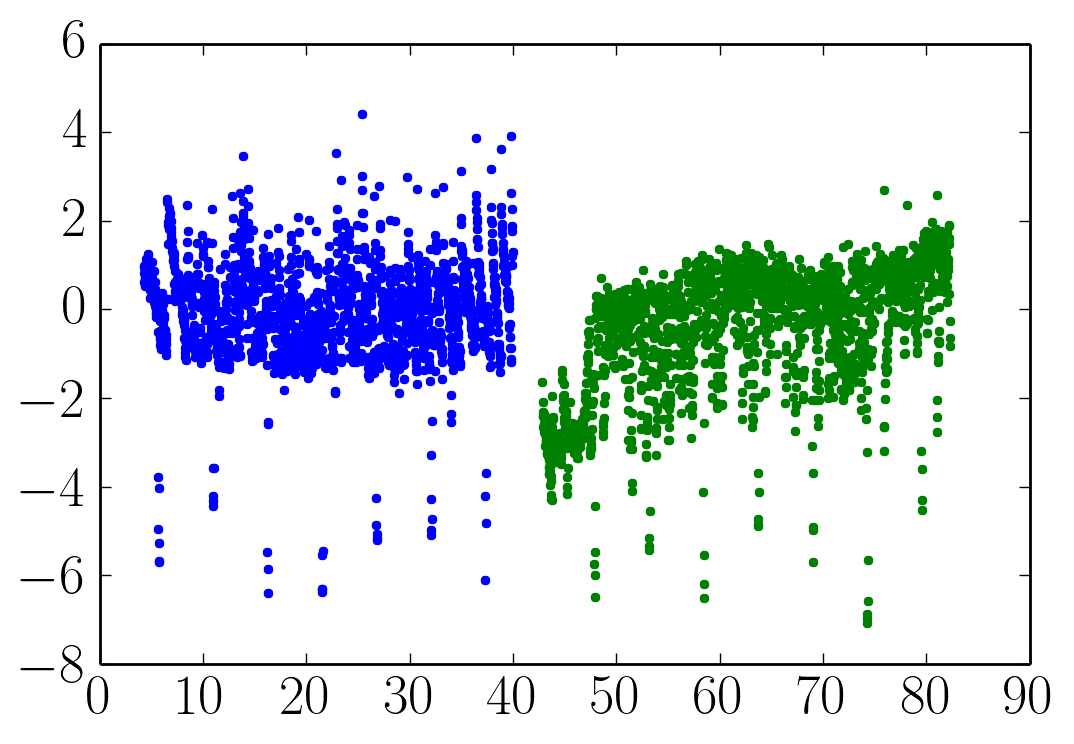

In [7]:
lcs = r.model_light_curves
[pl.plot(lc.time, lc.flux, ".") for lc in lcs];

In [8]:
r.peaks

[{'depth': 4.3404086850736663,
  'depth_ivar': 614.55218578403765,
  'duration': 0.1,
  'lnZ_box': -1938.2937221853879,
  'lnZ_none': -8662.3840791266521,
  'lnZ_outlier': -8395.5701694377713,
  'lnZ_transit': -1228.753997332055,
  'lnlike_box': -1936.0037641408617,
  'lnlike_none': -8662.3840791266521,
  'lnlike_outlier': -8394.7706696380083,
  'lnlike_transit': -1197.2590589257798,
  'period': 5.2737511777769877,
  'phic_same': 3948.0486878060169,
  'phic_same_second': 1748.7363289313466,
  'phic_variable': -20094.078238299786,
  's2n': 107.59943915880156,
  't0': 0.46103886128550808,
  'transit_b': 0.47375173846815094,
  'transit_duration': 0.12083346070245365,
  'transit_period': 5.2749744372240874,
  'transit_q1': 0.49970565182467924,
  'transit_q2': 0.49986625128265905,
  'transit_ror': 0.069902727768176728,
  'transit_t0': 0.45029593717149341},
 {'depth': 1.0222762703858868,
  'depth_ivar': 293.21631848667585,
  'duration': 0.1,
  'lnZ_box': -1090.4177095359553,
  'lnZ_none': -1

(-2.6741603898160964, 3.3258396101839036)

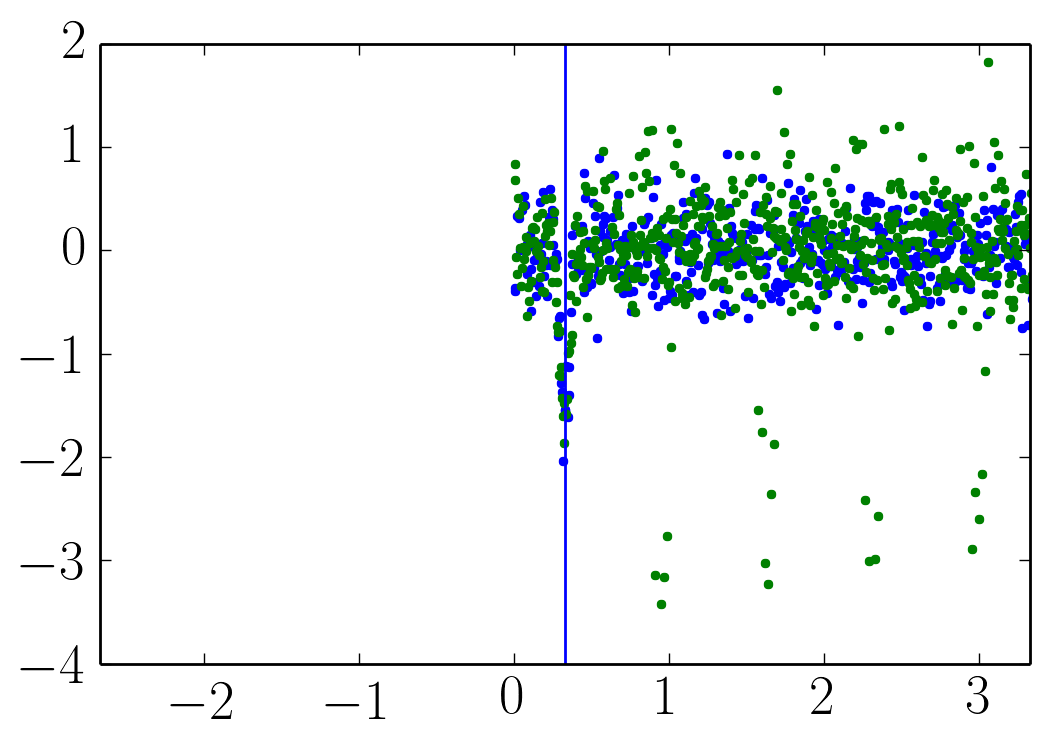

In [10]:
p = r.peaks[1]

s = SimpleSystem(period=p["transit_period"],
                 t0=p["transit_t0"],
                 ror=p["transit_ror"],
                 impact=p["transit_b"],
                 duration=p["transit_duration"],
                 q1=p["transit_q1"],
                 q2=p["transit_q2"])

[pl.plot(lc.time % (p["transit_period"]), lc.flux - lc.predict(lc.flux - 1e3*(s.light_curve(lc.time)-1.0)), ".") for lc in lcs]
pl.gca().axvline(p["transit_t0"]);
pl.xlim(p["transit_t0"]-3, p["transit_t0"]+3)